In [1]:
### Importieren der verwendeten Bibliotheken
import os
import glob
import time #optional, um Rechenzeit auszugeben

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## import additional python functions, scripts:
import helper_functions

## dummy variables:
t = time.time()

In [34]:
# Einlesen der gepickelten Daten: (Nach dem picklen und preprocessing. d.h. nach ausführen von "example_01_preprocessReadInData" auf das dataset.)
fileName = "01_211203_TUDA_data"    # hier entsprechenden Dateinamen der .pickle Datei angeben
filenamePath = os.path.join("..", "..", "data", "TUDA_data", fileName + ".pickle")

df = pd.read_pickle(filenamePath) # direkt ganze pickle Datei einlesen, effizient!

In [7]:
df.shape[0]
#df

12038488

## Latency

In [26]:
# Erstellen "Latency"-Spalte
df['latency'] = df['timestamp_index'] - df['timestamp_transfer']
df['latency'].describe(include='all')


count    1.203849e+07
mean     7.865250e+00
std      2.293601e+02
min     -6.004000e+00
25%      1.827000e+00
50%      2.475000e+00
75%      7.638000e+00
max      2.385791e+05
Name: latency, dtype: float64

In [6]:
#grobe Statistik-Unterschiede GNSS/mobile
latency_grpby_dpos = df.groupby(by='determination_position')['latency']
latency_grpby_dpos.describe(include='all')

,count,mean,std,min,25%,50%,75%,max
determination_position,,,,,,,,
1,7123432.0,7.711503,173.996104,-6.004,1.841,2.479,9.849,219700.072
4,4915056.0,8.088078,291.497934,0.014,1.805,2.470,5.332,238579.135


In [ ]:
high_latency = df[df['latency'] <= 100]
high_latency_describe = high_latency['latency'].describe(include='all')
high_latency_describe

In [10]:
#df_latency_grp = pd.cut(latency_grpby_dpos, bins = 10)
#plt.hist(df['latency'], bins=100, log=True)
#df.dtypes

wagon_ID                              int64
loading_state                         int64
loading_state_update                float64
altitude                            float64
latitude                            float64
longitude                           float64
signal_quality_satellite            float64
signal_quality_hdop                 float64
determination_position                int64
GNSS_velocity                       float64
timestamp_measure_position          float64
timestamp_transfer                  float64
movement_state                      float64
timestamp_measure_movement_state     object
timestamp_index                     float64
provider                              int64
wagon_construction                  float64
wagon_type                          float64
dtype: object

(array([5.000000e+00, 2.000000e+01, 2.800000e+01, 5.600000e+01,
        9.000000e+01, 7.470000e+02, 1.167239e+06, 4.856780e+06,
        1.911427e+06, 4.713150e+05, 2.645340e+05, 2.016880e+05,
        1.781200e+05, 1.694590e+05, 1.676030e+05, 1.671010e+05,
        1.690570e+05, 1.694370e+05, 1.727790e+05, 1.736990e+05,
        1.651130e+05, 1.505770e+05, 1.338270e+05, 1.121700e+05,
        9.441100e+04, 8.597200e+04, 7.955100e+04, 7.505100e+04,
        7.007800e+04, 6.362900e+04, 5.859500e+04, 5.520200e+04,
        5.037800e+04, 4.660400e+04, 4.120600e+04, 3.658200e+04,
        3.138700e+04, 2.755800e+04, 2.524500e+04, 2.354200e+04,
        2.154800e+04, 2.007100e+04, 1.789300e+04, 1.641200e+04,
        1.571300e+04, 1.512000e+04, 1.458400e+04, 1.367700e+04,
        1.257000e+04, 1.157400e+04, 1.150200e+04, 1.138600e+04,
        1.057100e+04, 9.222000e+03, 8.617000e+03, 8.090000e+03,
        7.941000e+03, 7.734000e+03, 7.093000e+03, 6.889000e+03,
        6.890000e+03, 6.361000e+03, 5.85

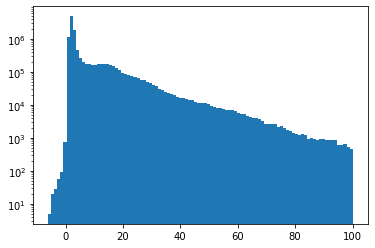

In [27]:
plt.hist(high_latency['latency'], bins=100, log=True)

## Coverage / Mobile Quality

In [13]:
# Coverage , Probleme mit Datentypen

#df.drop(df.loc[df['timestamp_measure_movement_state']=='NaT'].index, inplace=True)
#df['timestamp_measure_movement_state'] = df['timestamp_measure_movement_state'].apply(lambda x: x.astype('float64') if x != 'NaT' else 'NaT')
#df['timestamp_measure_movement_state'].astype('float64')
#diff = df['timestamp_measure_movement_state'] - df['timestamp_measure_position']
#df['coverage'] = df['timestamp_transfer'] - df['timestamp_measure_position']
#df.shape[0]

AttributeError: 'float' object has no attribute 'astype'

In [ ]:
#diff.describe(include='all')
#diff.mean()

## GNSS Quality

In [ ]:
counts = df['determination_position'].value_counts()
counts

In [42]:
counts_hdop = df['signal_quality_hdop'].value_counts()
counts_hdop


2.0     2955704
3.0     1067741
1.0      606593
4.0      498551
5.0      190955
         ...   
21.4          1
18.4          1
17.3          1
22.3          1
47.0          1
Name: signal_quality_hdop, Length: 246, dtype: int64

In [57]:
df_50 = df[df['signal_quality_hdop'] <= 50]
counts_hdop = df_50['signal_quality_hdop'].value_counts(bins=10)
counts_hdop

(-0.051000000000000004, 5.0]    6601326
(5.0, 10.0]                      405639
(10.0, 15.0]                      73188
(15.0, 20.0]                      29361
(20.0, 25.0]                      13375
(45.0, 50.0]                        189
(25.0, 30.0]                         64
(30.0, 35.0]                         52
(35.0, 40.0]                         38
(40.0, 45.0]                         37
Name: signal_quality_hdop, dtype: int64

In [6]:
counts_satellite = df['signal_quality_satellite'].value_counts()
counts_satellite

5.0     935153
9.0     872774
6.0     841076
8.0     831759
10.0    787423
7.0     769483
4.0     730009
11.0    549212
12.0    349354
3.0     228848
13.0    125195
2.0      48342
14.0     29914
15.0     10421
1.0       7483
16.0      3767
0.0       1548
17.0      1246
18.0       333
19.0        71
20.0        15
21.0         4
22.0         2
Name: signal_quality_satellite, dtype: int64

In [22]:
#signal_quality_satellite scalen auf [0,1]
df['signal_quality_satellite'] = (df.signal_quality_satellite-df.signal_quality_satellite.min())/(df.signal_quality_satellite.max()-df.signal_quality_satellite.min())

#signal_quality_hdop scalen auf [0,1]
df['signal_quality_hdop'] = 1 - (df.signal_quality_hdop-df.signal_quality_hdop.min())/(20-df.signal_quality_hdop.min())

In [60]:
# hdop und satellite zu GNSS_quality zusammenführen. Faktoren können hier noch angepasst werden

df['GNSS_quality'] = df['signal_quality_satellite']*0.5 + df['signal_quality_hdop']*0.5

# wenn keine GNSS-Daten empfangen werden können, wird der Datensatz zu 0 (NaN --> 0)
df['GNSS_quality'].fillna(0)
df['GNSS_quality']

0           6.60
1           6.55
2           6.50
3           6.15
4           6.45
            ... 
12038483     NaN
12038484     NaN
12038485    4.50
12038486    3.00
12038487    3.00
Name: GNSS_quality, Length: 12038488, dtype: float64

## Count number of NaN and NaT values


In [52]:
count_nan_in_df = df.isnull().sum()
count_nan_in_df['timestamp_measure_movement_state'] = df.loc[df['timestamp_measure_movement_state'] == 'NaT'].shape[0]
count_nan_in_df['timestamp_transfer'] = df.loc[df['timestamp_transfer'] == 'NaT'].shape[0]
count_nan_in_df['timestamp_index'] = df.loc[df['timestamp_index'] == 'NaT'].shape[0]
count_nan_in_df['timestamp_measure_position'] = df.loc[df['timestamp_measure_position'] == 'NaT'].shape[0]
count_nan_in_df['loading_state_update'] = df.loc[df['loading_state_update'] == 'NaT'].shape[0]

#add number positions determined by mobile data for comparison (should be the same as the NaN values in signal_quality)
count_nan_in_df['determination_position'] = df.loc[df['determination_position'] == 4].shape[0]

count_nan_in_df

wagon_ID                                  0
loading_state                             0
loading_state_update                      0
altitude                            4915056
latitude                                  0
longitude                                 0
signal_quality_satellite            4915056
signal_quality_hdop                 4915056
determination_position              4915056
GNSS_velocity                       4915056
timestamp_measure_position                0
timestamp_transfer                        0
movement_state                      7964078
timestamp_measure_movement_state    7964078
timestamp_index                           0
provider                                  0
wagon_construction                        0
wagon_type                                0
dtype: int64